In [1]:
!pip install imblearn

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import EDA as d
import dataOperations as dt
import matplotlib.pyplot as plt

In [3]:
#Load Datasets

In [4]:
data = d.dataLoad()
data

,School,Sex,Age,Address,Family_size,Parents_status,Mother_education,Father_education,Mother_job,Father_job,...,Free_time,Go_out,Workday_alcohol_usage,Weekday_alcohol_usage,Health,Absences,Period1_score,Period2_score,Final_score,Final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,2
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,1


In [5]:
#checking null values
d.checkNotnull(data)

School                     False
Sex                        False
Age                        False
Address                    False
Family_size                False
Parents_status             False
Mother_education           False
Father_education           False
Mother_job                 False
Father_job                 False
Reason                     False
Guardian                   False
Travel_time                False
Study_time                 False
Failures                   False
School_support             False
Family_support             False
Paid_class                 False
Activities                 False
Nursery                    False
Higher_education           False
Internet                   False
Romantic                   False
Family_relation_quality    False
Free_time                  False
Go_out                     False
Workday_alcohol_usage      False
Weekday_alcohol_usage      False
Health                     False
Absences                   False
Period1_sc

In [6]:
# displaying Statistical information of the dataset
d.statInfo(data)

                              Mean  Median  Standard Deviation  Maximum  \
Age                      16.726054    17.0            1.239975       22   
Mother_education          2.603448     3.0            1.124907        4   
Father_education          2.387931     2.0            1.099938        4   
Travel_time               1.522989     1.0            0.731727        4   
Study_time                1.970307     2.0            0.834353        4   
Failures                  0.264368     0.0            0.656142        3   
Family_relation_quality   3.935824     4.0            0.933401        5   
Free_time                 3.201149     3.0            1.031507        5   
Go_out                    3.156130     3.0            1.152575        5   
Workday_alcohol_usage     1.494253     1.0            0.911714        5   
Weekday_alcohol_usage     2.284483     2.0            1.285105        5   
Health                    3.543103     4.0            1.424703        5   
Absences                 

# Data Visualisation

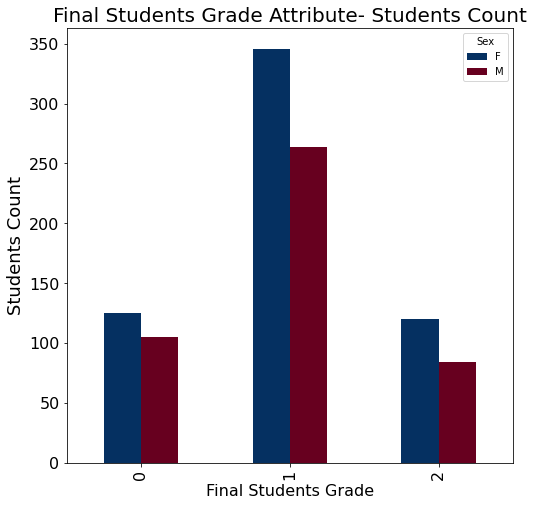

In [7]:
%matplotlib inline
import matplotlib.pyplot as pl
import seaborn as s
#displays the count of Final Grade (How many students got high, how many got low etc)
try:
    tab1 = pd.crosstab(index=data.Final_grade, columns=data.Sex)
    tab1.plot.bar(colormap="RdBu_r", fontsize=16, figsize=(8,8))
    pl.title('Final Students Grade Attribute- Students Count',fontsize=20)
    pl.xlabel('Final Students Grade', fontsize=16)
    pl.ylabel('Students Count', fontsize=18)
except ValueError:
    print("Please check the value")
    

Number of female students: 591
Number of male students: 453


Text(0.5, 1.0, 'Gender-wise Count')

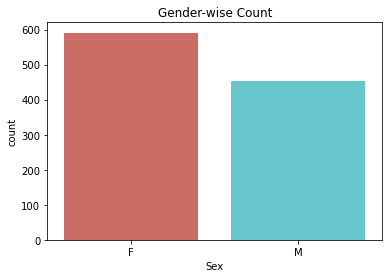

In [8]:
female_count = len(data[data['Sex'] == 'F'])    # Count of female students
print('Number of female students:',female_count)
male_count = len(data[data['Sex'] == 'M'])    # Count of male students
print('Number of male students:',male_count)
graph2=s.countplot(x='Sex',data=data,palette='hls')
graph2.axes.set_title('Gender-wise Count')

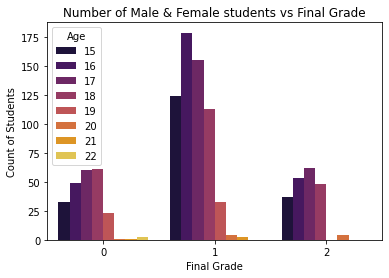

In [9]:
# Combine the Male and female students based on the final grade and display in plots
graph3 = s.countplot(x='Final_grade',hue='Age', data=data, palette='inferno')
graph3.axes.set_title('Number of Male & Female students vs Final Grade')
graph3.set_xlabel("Final Grade")
graph3.set_ylabel("Count of Students")
pl.show()

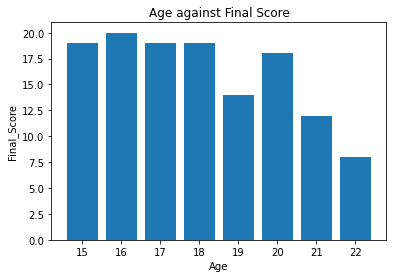

In [10]:

# Bar chart with Age against Grades
plt.bar(data['Age'], data['Final_score'])
plt.title("Age against Final Score")
# Setting the X and Y labels
plt.xlabel('Age')
plt.ylabel('Final_Score')
# Adding the legends
plt.show()

In [11]:
# Find the corelation of data
d.mostCorr(data)

Final_score              1.000000
Period2_score            0.910743
Final_grade              0.847435
Period1_score            0.809142
Failures                 0.383145
Mother_education         0.201472
Study_time               0.161629
Father_education         0.159796
Workday_alcohol_usage    0.129642
Name: Final_score, dtype: float64


In [12]:
#Heatmap shows the correlation of the highly contributed attributes

attr_corr = data.corr()
attr_corr.style.background_gradient(cmap='coolwarm')

,Age,Mother_education,Father_education,Travel_time,Study_time,Failures,Family_relation_quality,Free_time,Go_out,Workday_alcohol_usage,Weekday_alcohol_usage,Health,Absences,Period1_score,Period2_score,Final_score,Final_grade
Age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282,-0.099711
Mother_education,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472,0.193964
Father_education,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796,0.144811
Travel_time,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627,-0.073997
Study_time,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629,0.157287
Failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145,-0.344861
Family_relation_quality,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461,0.053116
Free_time,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890,-0.051580
Go_out,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877,-0.105747
Workday_alcohol_usage,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642,-0.143813


# Class Imbalance

     Mother_education  Father_education  Study_time  Failures  \
0                   4                 4           2         0   
1                   1                 1           2         0   
2                   1                 1           2         3   
3                   4                 2           3         0   
4                   3                 3           2         0   
..                ...               ...         ...       ...   
644                 2                 3           3         1   
645                 3                 1           2         0   
646                 1                 1           2         0   
647                 3                 1           1         0   
648                 3                 2           1         0   

     Workday_alcohol_usage  Period1_score  Period2_score  Final_score  
0                        1              5              6            6  
1                        1              5              5            6  
2  

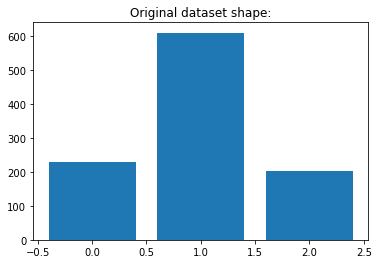

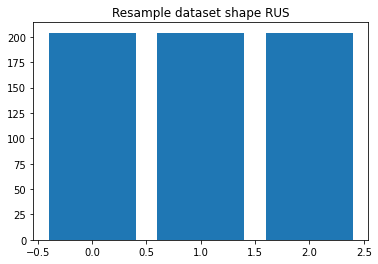

In [13]:
#Preparing Dataset for Modelling
try:
    mydata = data.copy()
    xtrain_data,xtest_data,ytrain_data,ytest_data, mydata=dt.dataSplit(mydata)
except ValueError:
    print("Please check the value")
except:
    print("Error in fetching data")


# Random forest regression

In [14]:
# get dummy varibles 
xtrain_data = pd.get_dummies(xtrain_data)
xtest_data = pd.get_dummies(xtest_data)

In [15]:
# Regression analysis report for Random forest Regression model operation and display final grade prediction
dt.RFR(xtrain_data,xtest_data,ytrain_data,ytest_data)

Classification Analysis Report

Mean squared error : 0.0
Mean absolute error : 0.0
Root Mean Squared Error : 0.0
Accuracy Score of RFR:  1.0
Raondom Forest Regression Model Score : 1.0 , Cross Validation Score : 1.0
Confusion Matrix : [[44  0  0]
 [ 0 57  0]
 [ 0  0 52]]
Classification report : 
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        44
           1      1.000     1.000     1.000        57
           2      1.000     1.000     1.000        52

    accuracy                          1.000       153
   macro avg      1.000     1.000     1.000       153
weighted avg      1.000     1.000     1.000       153



0

# Random forest Classification

Classification Analysis Report

Mean squared error : 0.01
Mean absolute error : 0.01
Root Mean Squared Error : 0.11
Accuracy Score of RFC: 0.9869281045751634
Raondom Forest Model Score : 1.0 , Cross Validation Score : 0.9869281045751634
[[44  0  0]
 [ 0 56  1]
 [ 0  1 51]]
Classification report : 
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        44
           1      0.982     0.982     0.982        57
           2      0.981     0.981     0.981        52

    accuracy                          0.987       153
   macro avg      0.988     0.988     0.988       153
weighted avg      0.987     0.987     0.987       153



0

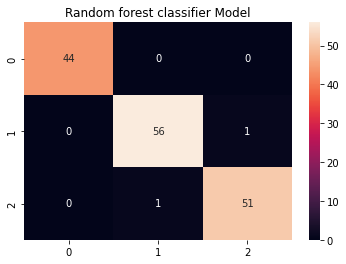

In [16]:
# Classification analysis report for Random forest Regression model
dt.RFC(xtrain_data,xtest_data,ytrain_data,ytest_data)

# Support Vector Machine Modelling

Classification Analysis Report

Mean squared error : 0.0
Mean absolute error : 0.0
Root Mean Squared Error : 0.0
Accuracy Score of SVM: 1.0
SVM Model Score : 1.0 , Cross Validation Score : 1.0
[[44  0  0]
 [ 0 57  0]
 [ 0  0 52]]
Classification report : 
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        44
           1      1.000     1.000     1.000        57
           2      1.000     1.000     1.000        52

    accuracy                          1.000       153
   macro avg      1.000     1.000     1.000       153
weighted avg      1.000     1.000     1.000       153



0

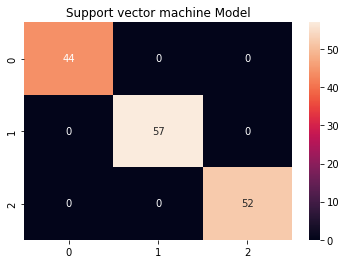

In [17]:
# Analysis report for Support vector modelling
dt.SuppotVM(xtrain_data,xtest_data,ytrain_data,ytest_data)

# Multi-Layer Perceptron Neural Networks Modelling

In [ ]:
# Analysis report for Multi-Layer Perceptron Neural Networks Modelling
dt.MLPC(xtrain_data,xtest_data,ytrain_data,ytest_data)